## Homework 3 - Due on October 5, 2021 at 11.59 PM

### This homework is about understanding linear regression using the Advertising data set

In [35]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 5]


#### Read the data and visualize it to see how the variables are related

In [25]:
adv = pd.read_csv('Advertising.csv')
adv.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


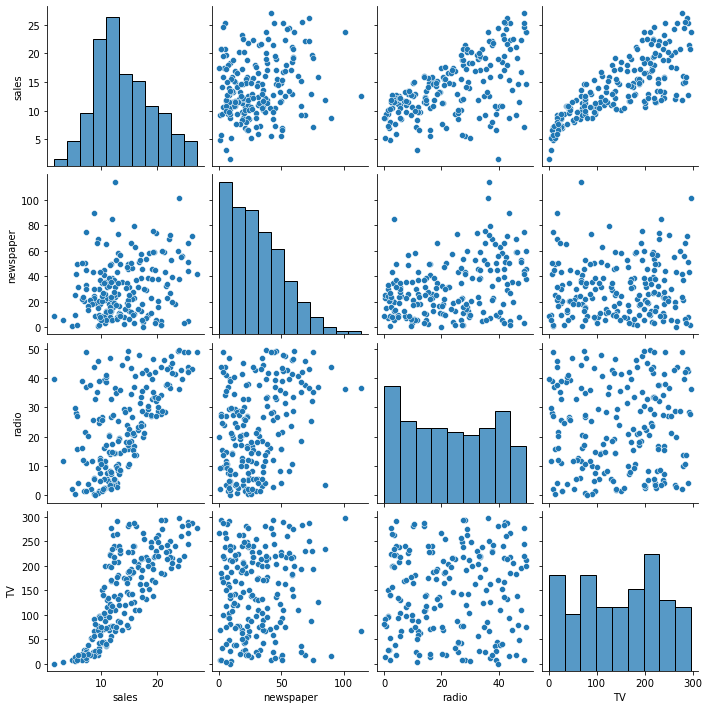

In [26]:
sns.pairplot(adv,vars={'sales','TV','radio','newspaper'})


#### Extract values from the DataFrame into numpy arrays x and y

In [27]:
x = adv.iloc[:,1:2].values #tv amount spent
#print(len(x))
y = adv.iloc[:,4].values #total sales

#### Q2 ####

#Assigning radio sales to a variable 
radio_sales = adv.iloc[:,2:3].values

#Assigning newspaper sales to a variable 
news_sales = adv.iloc[:,3:4].values

############


#### Define the Model to be a linear regression model. The intercept corresponds to having the constant term $\beta_0$

In [28]:
#TV
model = LinearRegression(fit_intercept=True)
reg = model.fit(x,y)
print('TV: Regression coefficients are',reg.coef_)
print('TV: The Intercept beta_0 is',reg.intercept_,'\n')


#### Q2 ####

#Radio 
tv_model = LinearRegression(fit_intercept=True)
radio_reg = tv_model.fit(radio_sales,y)
print('Radio: Regression coefficients are',radio_reg.coef_)
print('Radio: The Intercept beta_0 is',radio_reg.intercept_,'\n')

#Newspaper
radio_model = LinearRegression(fit_intercept=True)
news_reg = radio_model.fit(news_sales,y)
print('Newspaper: Regression coefficients are',news_reg.coef_)
print('Newspaper: The Intercept beta_0 is',news_reg.intercept_)

############


TV: Regression coefficients are [0.04753664]
TV: The Intercept beta_0 is 7.032593549127693 

Radio: Regression coefficients are [0.20249578]
Radio: The Intercept beta_0 is 9.311638095158283 

Newspaper: Regression coefficients are [0.0546931]
Newspaper: The Intercept beta_0 is 12.35140706927816


In [29]:
#TV
yfit = reg.predict(x)
mse = mean_squared_error(y,yfit)
R2 = r2_score(y,yfit)
print('TV: Mean square error = ',mse)
print('TV: R squared = ',R2,'\n')

#### Q2 ####

#Radio
radio_fit = radio_reg.predict(radio_sales)
mse_radio = mean_squared_error(y,radio_fit)
R2_radio = r2_score(y,radio_fit)
print('Radio: Mean square error = ',mse_radio)
print('Radio: R squared = ',R2_radio,'\n')

#Newspaper
news_fit = news_reg.predict(news_sales)
mse_news = mean_squared_error(y,news_fit)
R2_news = r2_score(y,news_fit)
print('Newspaper: Mean square error = ',mse_news)
print('Newspaper: R squared = ',R2_news,'\n')

############


TV: Mean square error =  10.512652915656757
TV: R squared =  0.611875050850071 

Radio: Mean square error =  18.09239774512544
Radio: R squared =  0.33203245544529525 

Newspaper: Mean square error =  25.674022720559698
Newspaper: R squared =  0.05212044544430516 



### Q2. I have given the code to plot the scatter plot and linear regression fit for Sales versus TV Add whatever is required so that you plot the scatter plot and linear regression fit for Sales vs radio and Sales vs newspaper in the other two plots. Also compute the regression coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ for the two regression problems

### I mixed the code above for the regressions to make it have better flow. Everything is labeled and printing is done for all

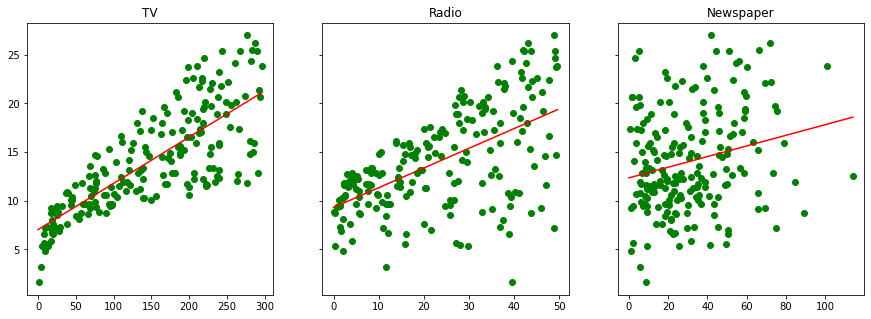

In [38]:
fig,ax = plt.subplots(1,3,sharey='row')
xax = np.linspace(0,np.max(x),100).reshape(-1,1)
yfit2 = reg.predict(xax)
#Plotting scatter for salves vs TV
ax[0].scatter(x,y,color='green')

#Plotting Regression for sales vs radio
ax[0].plot(xax,yfit2,color='red')
ax[0].title.set_text('TV') 

#### Q2 ####

#Radio
radio_ax = np.linspace(0,np.max(radio_sales),100).reshape(-1,1)
radio_fit2 = radio_reg.predict(radio_ax)

#Plotting scatter for sales vs radio
ax[1].scatter(radio_sales,y,color = 'green')
ax[1].title.set_text('Radio')

#Plotting Regression for sales vs radio
ax[1].plot(radio_ax,radio_fit2,color='red')


#Newspaper 
news_ax = np.linspace(0,np.max(news_sales),100).reshape(-1,1)
news_fit2 = news_reg.predict(news_ax)

#Plotting scatter for sales vs newspaper 
ax[2].scatter(news_sales,y,color = 'green')
ax[2].title.set_text('Newspaper')

#Plotting Regression for sales vs newspaper
ax[2].plot(news_ax,news_fit2,color='red')

############


### Q3. Compute the standard errors for $\hat{\beta}_0$ and $\hat{\beta}_1$, $t$-statistic and $p$-value for the Sales versus TV simple regression and show that you get the result in Table 3.1. 

In [31]:
y = adv.iloc[:,4:5].values #making y a 2D array 
y_est = reg.predict(x)
#print(y_est)
#plt.scatter(x,y_est)
#print(y_est[1])
RSS = 0
for i in range(0,len(y)):
    RSS = RSS + (y[i] - y_est[i])**2 
 
RSE = np.sqrt(RSS / (len(y) - 2))
print('TV: RSE =',RSE)
#This function computes the standard error of B1 for regressions
def SE_b1(RSE,X):
    mu_X = np.mean(X)
    diff_x = 0
    for i in range(0,len(X)):
        diff_x = diff_x + (x[i] - mu_X)**2
    SE_b1 = np.sqrt((RSE**2) / diff_x)
    return SE_b1

#Testing that the standard error matches for the TV B1
seb1_tv = SE_b1(RSE,x)
print('TV: Standard error for B1 =',seb1_tv)

#This function computes the standard error of B1 for regressions
def SE_b0(RSE,X):
    mu_X = np.mean(X)
    diff_x = 0
    for i in range(0,len(X)):
        diff_x = diff_x + (x[i] - mu_X)**2
    SE_b0 = np.sqrt( (RSE**2) * ( (1/len(X)) + ((mu_X**2) / diff_x ) ) )
    return SE_b0

#Testing that the standard error matches known for TV intercept
seb0_tv = SE_b0(RSE,x)
print('TV: Standard error for B0 =',seb0_tv)

#This function computes the T-statistics for B1
def t_statistic_1(seb1,regression):
    b1 = regression.coef_
    t_stat_1 = b1 / seb1
    return t_stat_1

#Testing what the t-statistic for TV's B1
t_stat_1_tv = t_statistic_1(seb1_tv,reg)
print('TV: t-statistic for B1 =',t_stat_1_tv)

#This function computes the T-statistics for B0
def t_statistic_0(seb0,regression):
    b0 = regression.intercept_
    t_stat_0 = b0 / seb0
    return t_stat_0

#Testing what the t-statistic for TV's B1
t_stat_0_tv = t_statistic_0(seb0_tv,reg)
print('TV: t-statistic for B0 =',t_stat_0_tv)
pvalue_TV_b0 = scipy.stats.norm.sf(t_stat_0_tv)*2
pvalue_TV_b1 = scipy.stats.norm.sf(t_stat_1_tv)*2
print('TV: p-values for intercept =',pvalue_TV_b0)
print('TV: p-values for TV coefficent =',pvalue_TV_b1)


TV: RSE = [3.25865637]
TV: Standard error for B1 = [0.00269061]
TV: Standard error for B0 = [0.45784294]
TV: t-statistic for B1 = [17.6676256]
TV: t-statistic for B0 = [15.36027517]
TV: p-values for intercept = [3.02288846e-53]
TV: p-values for TV coefficent = [7.44658613e-70]


### <center> $\color{maroon}{\text{Results for the advertising data}}$ </center>


 $~$  | $$\textbf{Coefficient}$$ | $$\textbf{Std. Error}$$ | $$\textbf{t-statistic}$$ | $$\textbf{p-value}$$
----------|-------------|-----------|------------|----------
$$\color{maroon}{\text{Intercept}}$$ |$$7.0325$$| $$0.4578$$| $$ 15.36 $$| $$ < 0.0001$$
$$\color{maroon}{\text{TV}}$$ | $$0.0475$$   | $$0.0027$$    | $$17.67$$     | $$ < 0.0001 $$

$$~$$

### Q4. Now, we move on to multiple linear regression. Compute the (multiple) linear regression model with all three variables TV, Newspaper and Radio as predictors and Sales as the response. Verify that the coefficients that you get match with those in the book. Compute the RSS, $R^2$

In [32]:
# This will contain the different advertisement amounts
variables = adv.values[:, 1:4]
# Modeling the multi-regression using sckit.learn
multi_model = LinearRegression(fit_intercept=True)
multi_reg_sci = multi_model.fit(variables, y)
print('TV: coefficent =', multi_reg_sci.coef_[0, 0])
print('Radio: coefficent =', multi_reg_sci.coef_[0, 1])
print('Newspaper: coefficent =', multi_reg_sci.coef_[0, 2])
print('Intercept =', multi_reg_sci.intercept_)

# Determining the RSS and R^2

# Computing TSS
mu_y = y.mean()
TSS_multi = 0
for i in range(0, len(y)):
    TSS_multi = TSS_multi + (y[i] - mu_y)**2

print('TSS for multiple linear regression =', TSS_multi)

# Estimating y based off the multi regression
y_multi_est = multi_reg_sci.predict(variables)

# Computing RSS
RSS_multi = 0
for i in range(0, len(y)):
    RSS_multi = RSS_multi + (y[i] - y_multi_est[i])**2

print('RSS for multiple linear regression =', RSS_multi)

# Cosmputing R^2

R2 = 1 - (RSS_multi / TSS_multi)
print('R^2 for multiple linear regression =', R2)

# Computing RSE for multiple linear regression

RSE_multi = np.sqrt((1/(len(y)-2))*RSS_multi)
print('RSE for multiple linear regression =', RSE_multi)


TV: coefficent = 0.045764645455397615
Radio: coefficent = 0.18853001691820456
Newspaper: coefficent = -0.0010374930424763272
Intercept = [2.93888937]
TSS for multiple linear regression = [5417.14875]
RSS for multiple linear regression = [556.8252629]
R^2 for multiple linear regression = [0.89721064]
RSE for multiple linear regression = [1.67697609]


### <center> $\color{maroon}{\text{Results for the advertising data}}$ </center>

$$~$$

| $$~$$                                | $$\textbf{Coefficient}$$ | $$\textbf{Std. Error}$$ | $$\textbf{t-statistic}$$ | $$\textbf{p-value}$$    |
| :----------------------------------: | :----------------------: | :---------------------: | :-------------------------------: | :---------------------: |
| $$\text{Intercept}$$                 |  $$2.939$$               | $$0.3119$$              | $$9.42$$                          | $$< 0.0001$$            |
| $$\color{maroon}{\text{TV}}$$        |  $$0.046$$               | $$0.0014$$              | $$32.81$$                          | $$< 0.0001$$            |
| $$\color{maroon}{\text{radio}}$$     |  $$0.189$$               | $$0.0086$$              | $$21.89$$                          | $$< 0.0001$$            | 
| $$\color{maroon}{\text{newspaper}}$$ | $$-0.001$$               | $$0.0059$$              | $$-0.18$$                          | $$0.8599$$              |

$~$
 <center>  $\text{Correlations}$ : </center> 

| $$~$$                                | $$\color{maroon}{\text{TV}}$$ | $$\color{maroon}{\text{radio}}$$| $$\color{maroon}{\text{newspaper}}$$ | $$\color{maroon}{\text{sales}}$$ |
| :--------------------------------:   | :---------------------------: | :-----------------------------: | :-----------------------------------------:  | :------------------------------: |
| $$\color{maroon}{\text{TV}}$$        |  $$1.0000$$                   | $$0.0548$$                      | $$ 0.0567 $$                            |  $$0.7822$$                      |
| $$\color{maroon}{\text{radio}}$$     |  $$~$$                        |   $$1.0000$$                    |  $$ 0.3541$$                             | $$0.5762$$                       |
| $$\color{maroon}{\text{newspaper}}$$ |  $$~$$                        |   $$~$$                         |  $$1.0000$$                          |  $$0.2283$$                      |
| $$\color{maroon}{\text{sales}}$$     |  $$~$$                        |   $$~$$                         |  $$~$$                                        |  $$1.0000$$                      |



### Q5. Compute the standard error, $t$-statistic and $p$-value and verify the result with Table 3.4

In [33]:
# Computing Sigma Square or Variance of the Irreducible Error
sigma_sq = RSS_multi / (len(y) - 4)
print('Variance of the irreducible error =', sigma_sq)

# Below is the matrix computation for computing the standard
# error of the coefficents

ones = np.ones(len(y))
x_temp = adv.values[:, 1:4]
# Appending a column of 1's to the X values
xa = np.insert(x_temp, 0, ones, axis=1)
# transposing the new matrix
xaT = xa.transpose()
# multiplying xaT by Xa
XaT_Xa = np.matmul(xaT, xa)
# computing the inverse of the matrix
C = np.linalg.inv(XaT_Xa)
# Now doing the final standard error computations
se_multi_b0 = np.sqrt(sigma_sq * C[0, 0])
se_multi_b1 = np.sqrt(sigma_sq * C[1, 1])
se_multi_b2 = np.sqrt(sigma_sq * C[2, 2])
se_multi_b3 = np.sqrt(sigma_sq * C[3, 3])
print('Multi: Standard error of Intercept =', se_multi_b0)
print('Multi: Standard error of TV =', se_multi_b1)
print('Multi: Standard error of Radio =', se_multi_b2)
print('Multi: Standard error of Newspaper =', se_multi_b3)

# Below will be the computation for the t-statistics for
# multi regression advertisement data

t_b0_multi = multi_reg_sci.intercept_ / se_multi_b0
t_b1_multi = multi_reg_sci.coef_[0, 0] / se_multi_b1
t_b2_multi = multi_reg_sci.coef_[0, 1] / se_multi_b2
t_b3_multi = multi_reg_sci.coef_[0, 2] / se_multi_b3

print('\nMulti: t-statistic for Intercept', t_b0_multi)
print('Multi: t-statistic for TV', t_b1_multi)
print('Multi: t-statistic for Radio', t_b2_multi)
print('Multi: t-statistic for Newspaper', t_b3_multi)

# Below will be the computation for the p-value for
# multi regression advertisement data

p_value_b0_multi = scipy.stats.norm.sf(t_b0_multi)*2
p_value_b1_multi = scipy.stats.norm.sf(t_b1_multi)*2
p_value_b2_multi = scipy.stats.norm.sf(t_b2_multi)*2
p_value_b3_multi = scipy.stats.norm.sf(np.abs(t_b3_multi))*2

print('\nMulti: p-value for Intercept', p_value_b0_multi)
print('Multi: p-value for TV', p_value_b1_multi)
print('Multi: p-value for Radio', p_value_b2_multi)
print('Multi: p-value for Newspaper', p_value_b3_multi)


Variance of the irreducible error = [2.84094522]
Multi: Standard error of Intercept = [0.31190824]
Multi: Standard error of TV = [0.0013949]
Multi: Standard error of Radio = [0.00861123]
Multi: Standard error of Newspaper = [0.00587101]

Multi: t-statistic for Intercept [9.42228844]
Multi: t-statistic for TV [32.80862443]
Multi: t-statistic for Radio [21.89349606]
Multi: t-statistic for Newspaper [-0.17671459]

Multi: p-value for Intercept [4.4136185e-21]
Multi: p-value for TV [4.43600362e-236]
Multi: p-value for Radio [2.99630115e-106]
Multi: p-value for Newspaper [0.85973258]


### <center> $\color{maroon}{\text{Table 3.4: Results for the advertising data}}$ </center>

$$~$$

| $$~$$                                | $$\textbf{Coefficient}$$ | $$\textbf{Std. Error}$$ | $$\textbf{t-statistic}$$ | $$\textbf{p-value}$$    |
| :----------------------------------: | :----------------------: | :---------------------: | :-------------------------------: | :---------------------: |
| $$\text{Intercept}$$                 |  $$2.939$$               | $$0.3119$$              | $$9.42$$                          | $$< 0.0001$$            |
| $$\color{maroon}{\text{TV}}$$        |  $$0.046$$               | $$0.0014$$              | $$32.81$$                          | $$< 0.0001$$            |
| $$\color{maroon}{\text{radio}}$$     |  $$0.189$$               | $$0.0086$$              | $$21.89$$                          | $$< 0.0001$$            | 
| $$\color{maroon}{\text{newspaper}}$$ | $$-0.001$$               | $$0.0059$$              | $$-0.18$$                          | $$0.8599$$              |

$~$
 <center>  $\text{Correlations}$ : </center> 

| $$~$$                                | $$\color{maroon}{\text{TV}}$$ | $$\color{maroon}{\text{radio}}$$| $$\color{maroon}{\text{newspaper}}$$ | $$\color{maroon}{\text{sales}}$$ |
| :--------------------------------:   | :---------------------------: | :-----------------------------: | :-----------------------------------------:  | :------------------------------: |
| $$\color{maroon}{\text{TV}}$$        |  $$1.0000$$                   | $$0.0548$$                      | $$ 0.0567 $$                            |  $$0.7822$$                      |
| $$\color{maroon}{\text{radio}}$$     |  $$~$$                        |   $$1.0000$$                    |  $$ 0.3541$$                             | $$0.5762$$                       |
| $$\color{maroon}{\text{newspaper}}$$ |  $$~$$                        |   $$~$$                         |  $$1.0000$$                          |  $$0.2283$$                      |
| $$\color{maroon}{\text{sales}}$$     |  $$~$$                        |   $$~$$                         |  $$~$$                                        |  $$1.0000$$                      |


### Q6. Repeat Q4 without using scikit.learn, i.e., use the least squares estimate that we derived in class using matrix algebra to compute the coefficients and see whether you get identical results

In [34]:
variables = adv.values[:,1:4]

#print(ones)
variables = np.insert(variables,0,ones,axis = 1)
variables_T = variables.transpose()
XTX = np.matmul(variables_T,variables)

inv_XTX = np.linalg.inv(XTX)
inv_XTX_XT = np.matmul(inv_XTX,variables_T)
b = np.matmul(inv_XTX_XT,y)
print('TV: coefficent =',b[1])
print('Radio: coefficent =',b[2])
print('Newspaper: coefficent =',b[3])
print('Intercept =',b[0])
print('\nThey match!!!')


TV: coefficent = [0.04576465]
Radio: coefficent = [0.18853002]
Newspaper: coefficent = [-0.00103749]
Intercept = [2.93888937]

They match!!!
